In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def generate_data(n:int, d: int):
    X = np.random.randn(n,d)
    W_oracle = np.random.randn(d)
    b = np.random.randn(1)
    print(f"True W: {W_oracle}, True b: {b}")
    Y_oracle = X.dot(W_oracle) + b + 0.05*np.random.randn(n)
    Y_oracle = (1/(1+np.exp(-1*Y_oracle)) > 0.5).astype(int)
    return X,Y_oracle

In [17]:
X, Y = generate_data(20000, 1)

True W: [-1.42126425], True b: [-1.42019238]


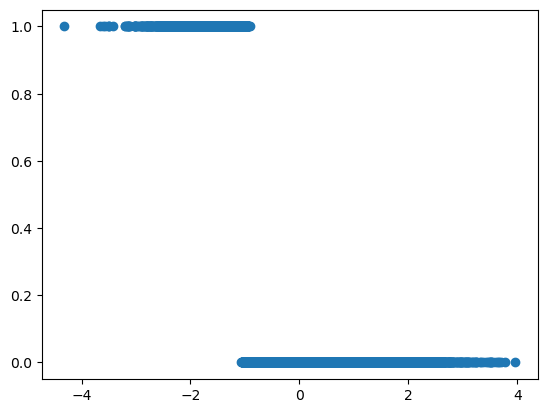

In [18]:
plt.scatter(X, Y)

In [6]:
X, Y = generate_data(20000, 10)

True W: [ 0.30214889  1.04535201 -3.24039072 -0.5421496   1.12179256 -0.11516384
 -0.64320492  1.28177563 -2.41221024 -1.77545692], True b: [0.49152349]


In [19]:
class LogisticRegression:
    def __init__(self, d):
        self.w = np.random.randn(d)
        self.b = np.random.randn(1)

    def forward(self, X_batch):
        z = X_batch.dot(self.w)+ self.b
        return 1/(1+np.exp(-z))

    def backward(self, X_batch, Y_pred, Y, bs):
        loss = -1*np.sum(np.log(np.where(Y, Y_pred, 1-Y_pred)))/bs
        gradient_w = np.dot(X_batch.T, (Y_pred.T - Y))
        gradient_b = np.sum((Y_pred.T - Y))
        return gradient_w, gradient_b
        
    def train(self, X, Y, lr=0.1, bs=32, epochs=10):
        n = X.shape[0]
        for _ in range(epochs):
            p = np.random.permutation(len(X))
            X = X[p]
            Y = Y[p]
            for i in range(0, n, bs):
                X_batch = X[i*bs:i*bs+bs]
                Y_batch = Y[i*bs:i*bs+bs]
                self.train_step(X_batch, Y_batch, lr, bs)

    def train_step(self, X_batch, Y_batch, lr, bs):
        Y_pred = self.forward(X_batch)
        gradient_w, gradient_b = self.backward(X_batch, Y_pred, Y_batch, bs)
        self.w -= lr * gradient_w
        self.b -= lr * gradient_b

In [20]:
model = LogisticRegression(d=1)

In [21]:
model.w, model.b

(array([-0.1854736]), array([-0.64121247]))

In [22]:
model.train(X, Y, epochs=50)

In [23]:
model.w, model.b

(array([-12.49035925]), array([-12.17005324]))